#Лабораторная работа 1

Для начала подключим библиотеки, которые нам понадобятся.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузим данные.

pandas - библиотека для работы с данными:объектами, признаками, ответами; numpy - библиотека для работы с матрицами и многомерными массивами; matplotlib.pyplot - -визуализация данных; для matplotlib, чтобы отображались графики команда %matplotlib inline

Ниже загружаем данные с помощью pd.read_csv.

sep=',' - аргумент, который задает символ, разделяющий значения в файлах.

In [2]:
data = pd.read_csv('zoo.csv'  , sep=',')
# Посмотрим первые 10 записей из набора данных
data.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Этот набор данных - список животных и их признаков (наличие шерсти, когтей, хвотса и т.д.). Будем предсказывать значение переменной hair, которая означает, есть ли у животного шерсть. Эта задача - задача бинарной классификации.

Вывод общей информации по колонкам: после column столбец обозначает сколько объектов (заполненных ячеек), non-null - ни один объект не пропущен.

В нашей выборке есть признаки "class_type" (порядковый номер класса)и "catsize" (размер животных больше кошки). Они нам не понадобятся. Выбросим их из выборки:

In [4]:
data = data.drop(['class_type', 'catsize'], axis='columns') # первый аргумент - список ненужных признаков,
                                                   # второй - поиск имен признаков по названиям колонок, а не строк

Посмотрим таблицу и убедимся, что ненужные нам колонки убрались 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 12.8+ KB


Посмотрим, можем ли мы выбросить еще какие-нибудь признаки из нашей таблицы. Это стоит делать, поскольку чем меньше признаков - тем легче вычислять расстояние между объектами, то есть алгоритм будет работать быстрее. Посмотрим на корреляцию признаков между собой. Построим графическое представление модуля значения корреляции попарно между признаками.

Если два признака коррелируют, то один из них нам не нужен. Самая явная корреляция показана 1, наименьшая нулем. Здесь не учитывается, что коэффициент корреляции может быть равен -1 (когда величины обратнопропорциональны), чтобы не засорять картинку. Смотрим, есть ли высокий модуль корреляции между признаками.

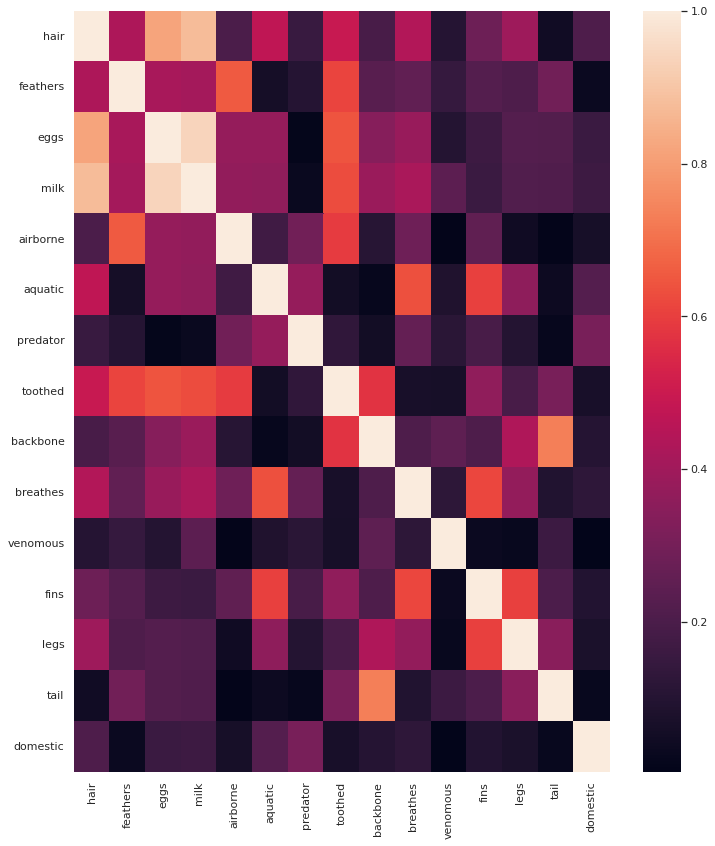

In [6]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Корреляция с целевой переменной, но числами

In [7]:
correlations_data = data.corr()['hair'].sort_values()
print(correlations_data)

eggs       -0.817382
aquatic    -0.473554
feathers   -0.427851
fins       -0.280313
airborne   -0.198431
predator   -0.154769
venomous   -0.104245
tail        0.048973
backbone    0.191681
domestic    0.207208
legs        0.394009
breathes    0.441149
toothed     0.492531
milk        0.878503
hair        1.000000
Name: hair, dtype: float64


Удалим из выборки признаки, высоко коррелирующие с другими признаками 

In [8]:
data = data.drop(['milk','tail','airborne', 'aquatic', 'fins', 'eggs','toothed'], axis='columns')

Посмотрим какие признаки остались:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   predator     101 non-null    int64 
 4   backbone     101 non-null    int64 
 5   breathes     101 non-null    int64 
 6   venomous     101 non-null    int64 
 7   legs         101 non-null    int64 
 8   domestic     101 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 7.2+ KB


Посмотрим их корреляцию:

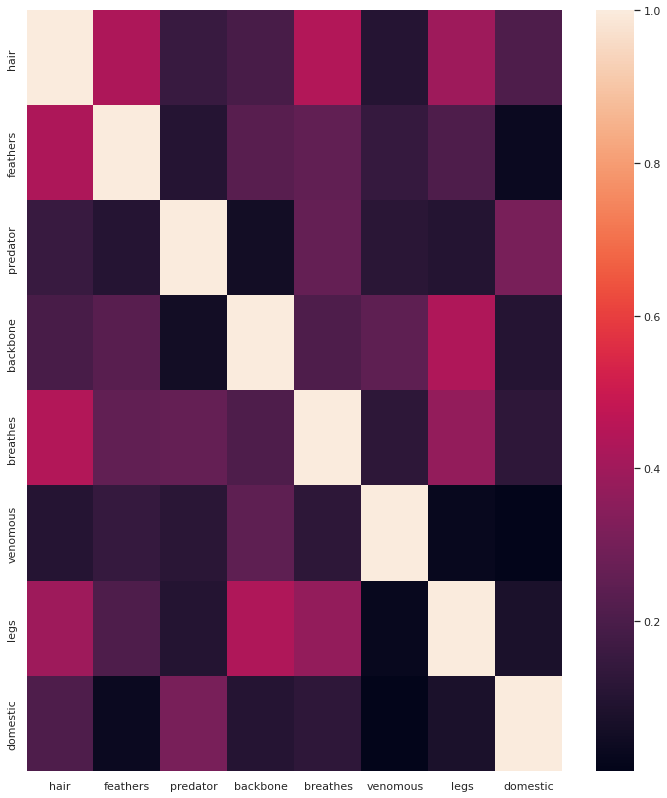

In [10]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Признаки, оставшиеся после прореживания

head() используется для возврата первых n (по умолчанию 5) строк фрейма данных или серии

In [11]:
data.head()

,animal_name,hair,feathers,predator,backbone,breathes,venomous,legs,domestic
0,aardvark,1,0,1,1,1,0,4,0
1,antelope,1,0,0,1,1,0,4,0
2,bass,0,0,1,1,0,0,0,0
3,bear,1,0,1,1,1,0,4,0
4,boar,1,0,1,1,1,0,4,0


Посмотрим какой тип переменных у наших колонок

In [12]:
data.dtypes

animal_name    object
hair            int64
feathers        int64
predator        int64
backbone        int64
breathes        int64
venomous        int64
legs            int64
domestic        int64
dtype: object

У нас одна текстовая колонка с названием животного. У нас задача бинарной классификации: "Имеет ли животное шерсть?". В данной задаче название животного роли не играет, поэтому удалим эту колонку

In [13]:
data = data.drop(['animal_name'], axis='columns')

Остались все признаки, которые имеют числовое значение.

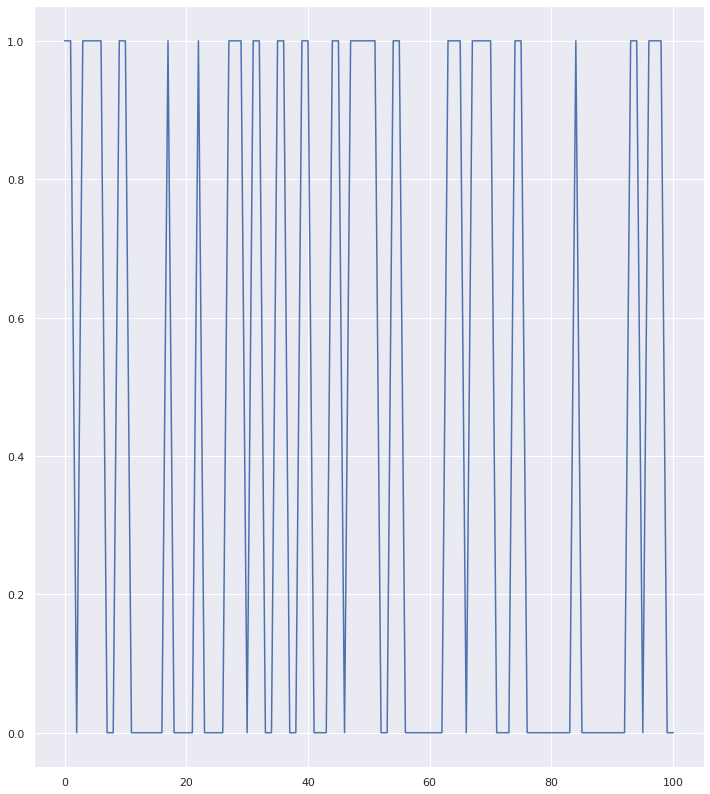

In [14]:
data['hair'].plot()

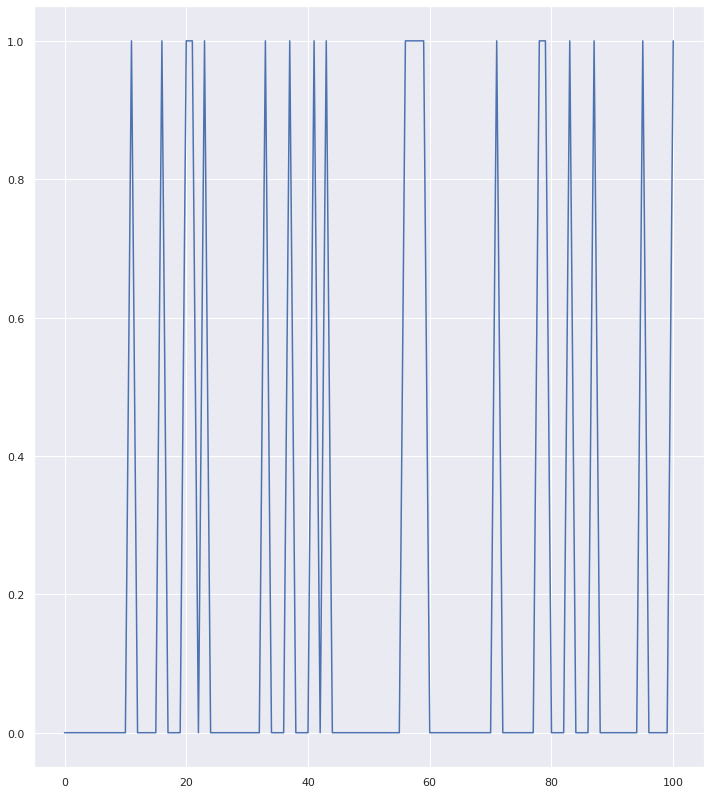

In [15]:
data['feathers'].plot()

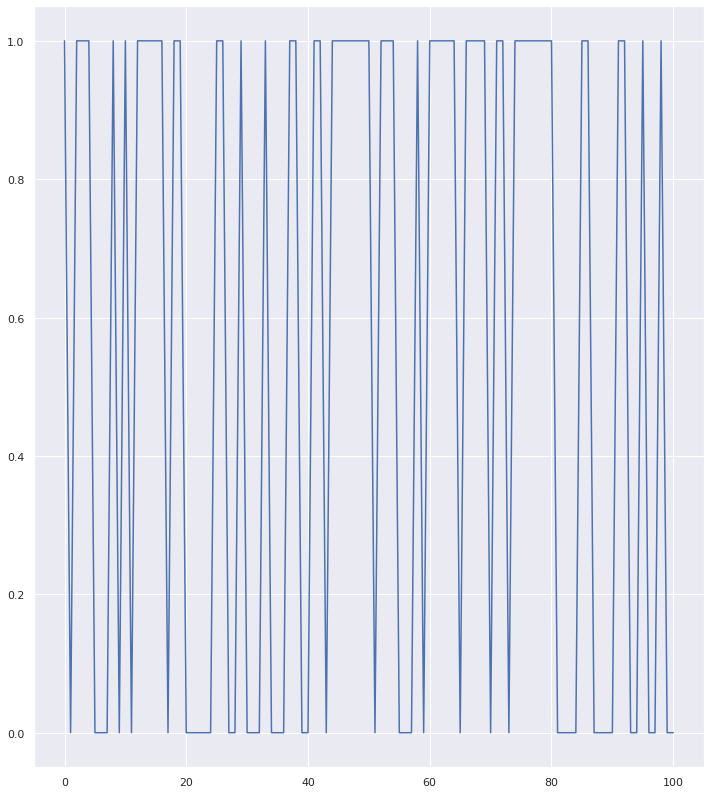

In [16]:
data['predator'].plot()

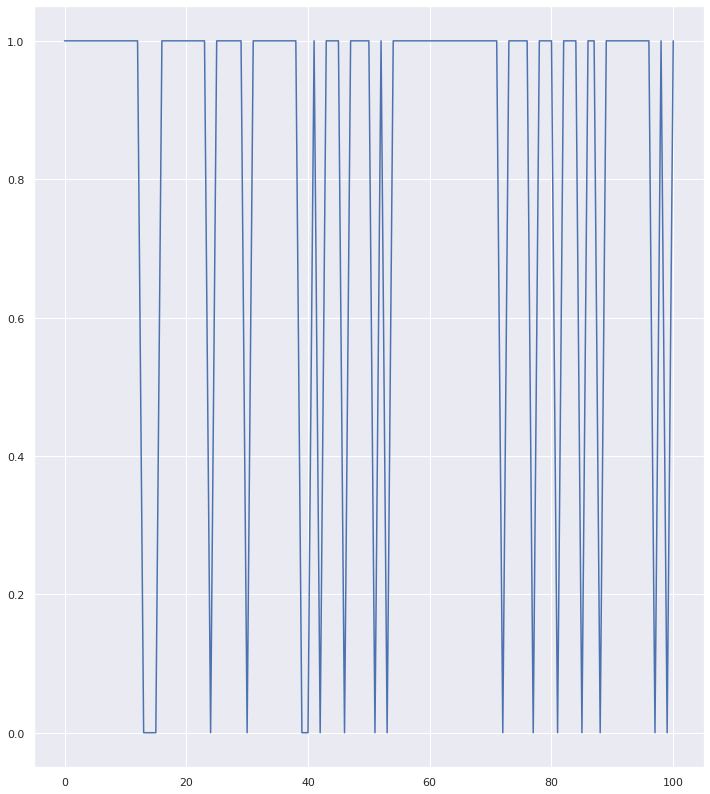

In [17]:
data['backbone'].plot()

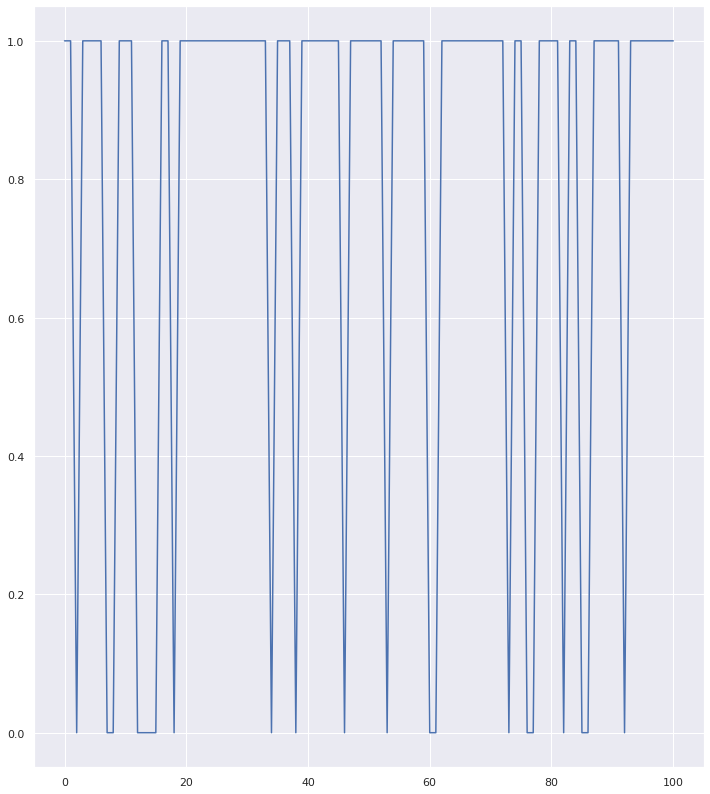

In [18]:
data['breathes'].plot()

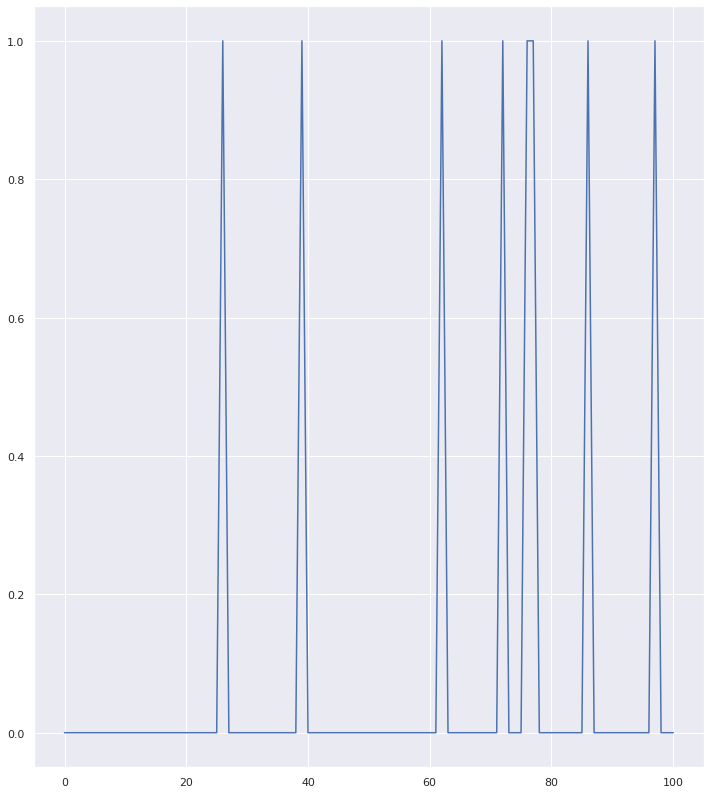

In [19]:
data['venomous'].plot()

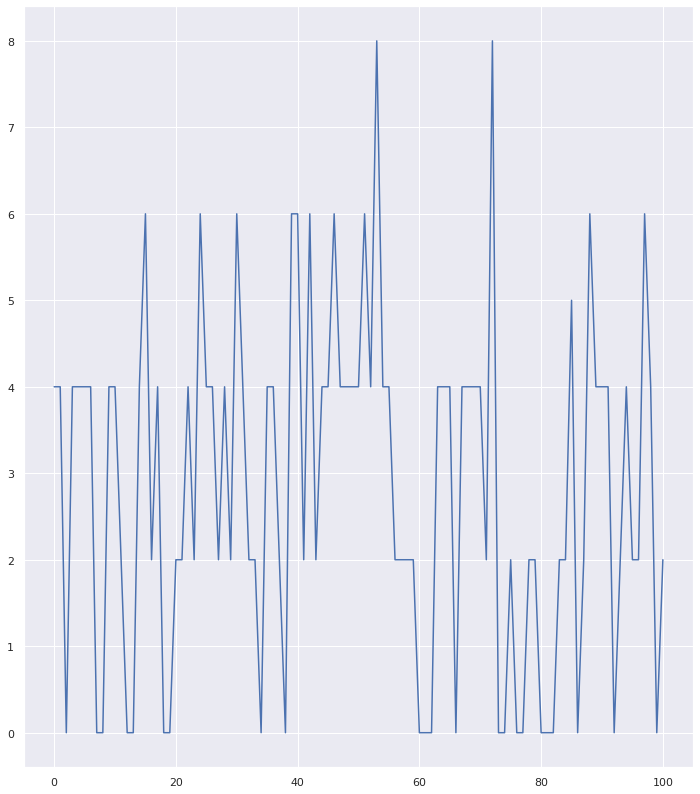

In [20]:
data['legs'].plot()

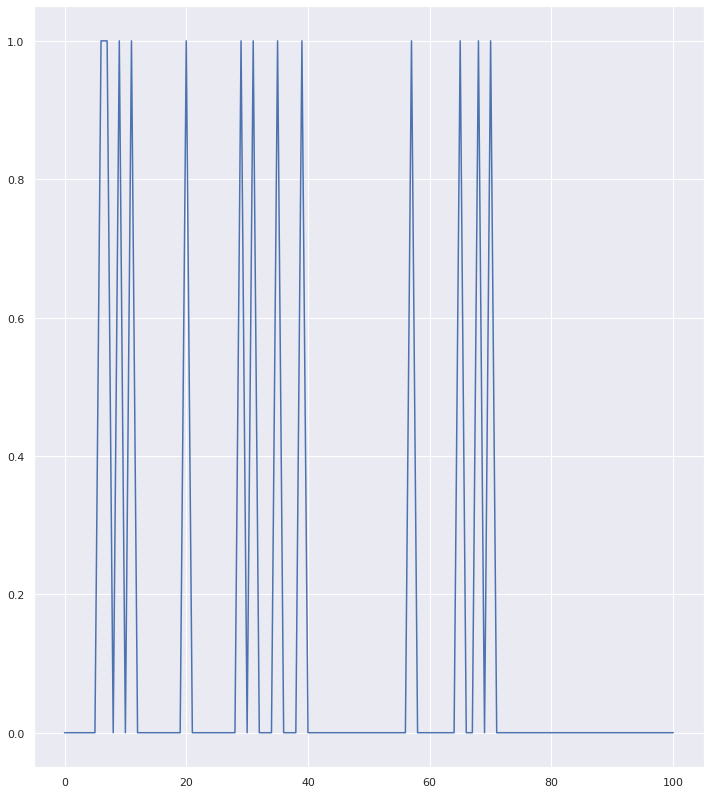

In [21]:
data['domestic'].plot()

Аномальных значений нет

Далее рассматриваем плотность. Смотрим распределение признаков, для того, чтобы избавится от признаков, значение которых одинаково для большинства объектов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08ec6ba390>,
      dtype=object)

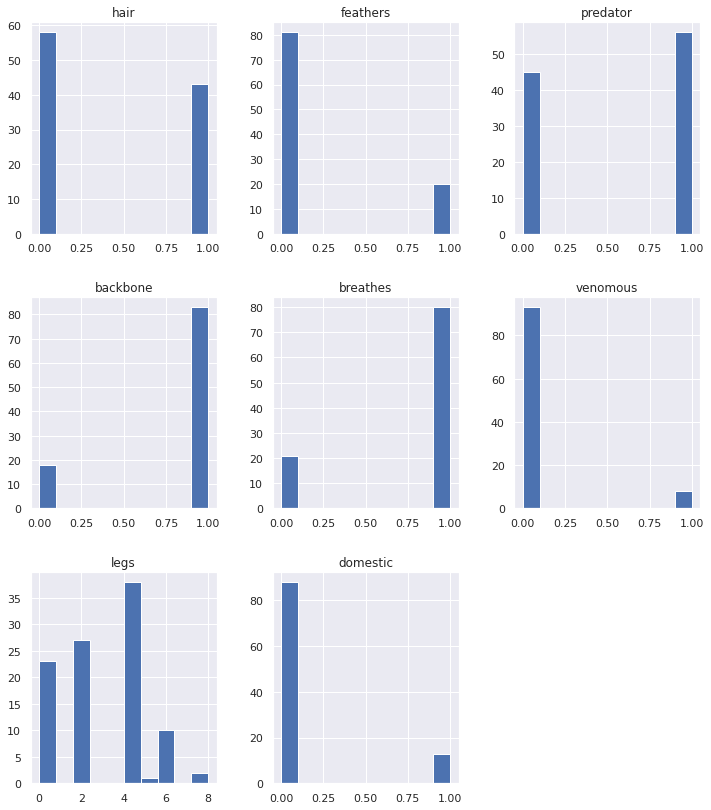

In [22]:
data.hist()

In [23]:
data.dtypes

hair        int64
feathers    int64
predator    int64
backbone    int64
breathes    int64
venomous    int64
legs        int64
domestic    int64
dtype: object

Посмотрим есть ли у нас пустые значения?

In [24]:
data.isna().any()

hair        False
feathers    False
predator    False
backbone    False
breathes    False
venomous    False
legs        False
domestic    False
dtype: bool

Пустых значений нет

# Machine Learning


Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую. Цель построения модели - классифицировать новые данные. По умолчанию,train_test_split откладывает 25% выборок в исходном наборе данных для тестирования.

В Х поместим все то, что не целевой признак. В У только целевой признак.

С помощью метода train_test_split разделим Х и У на X_train, X_test, y_train, y_test

In [25]:
X = data[data.columns[1:]]
y = data['hair']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)
                                                    

Будем проводить классификацию с помощью метода ближайших соседей.

Импортируем класс классификатора по ближайшим соседям KNeighborsClassifier

In [26]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=5)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
clf.score(X_test, y_test)

0.8387096774193549

Выше показана метрика доли правильных ответов. Посмотрим как гиперпараметр, т.е. количество соседей, будет влиять на качество классификации

In [27]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0]


Посмотрим, как влияет гиперпараметр на качество классификации

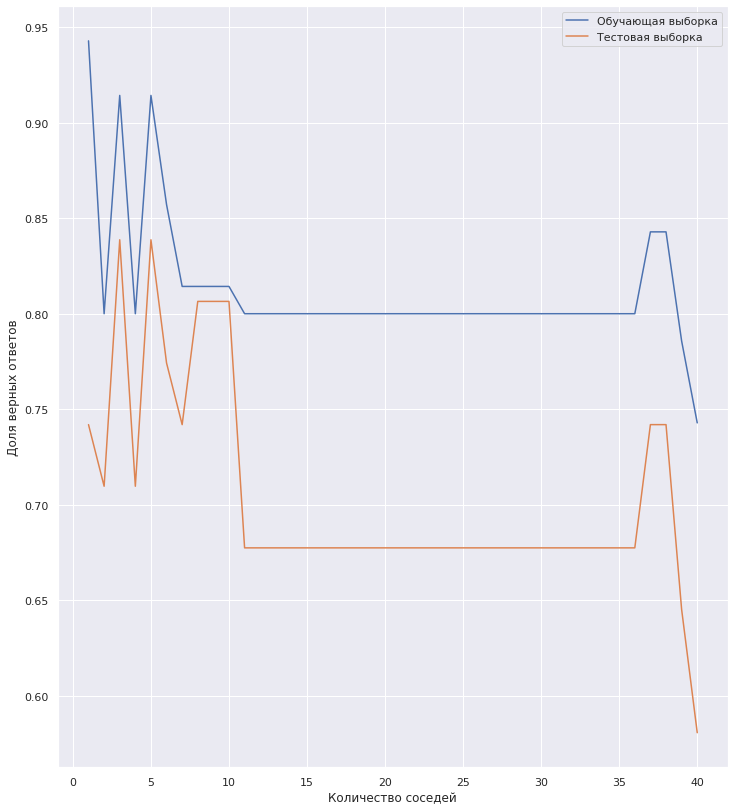

In [28]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 40 включительно
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, y_train)
    current_test_score = clf.score(X_test, y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()